In [261]:
#Imports used:
import sklearn as skl
import pandas as pd
import numpy as np

#Initializing our dataframe with the dataset from the csv file
df = pd.read_csv('Pancreas.csv')

#Returning the first 25 rows of the dataframe
df.head(25)


,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
5,S103,Cohort2,BPTB,53,M,1,NaN,NaN,NaN,0.84825,0.003393,62.126000,59.793000,NaN
6,S104,Cohort2,BPTB,70,M,1,NaN,NaN,NaN,0.62205,0.174381,152.277000,117.516000,NaN
7,S105,Cohort2,BPTB,58,F,1,NaN,NaN,11.0,0.89349,0.003574,3.730000,40.294000,NaN
8,S106,Cohort2,BPTB,59,F,1,NaN,NaN,NaN,0.48633,0.001945,7.021000,26.782000,NaN
9,S107,Cohort2,BPTB,56,F,1,NaN,NaN,24.0,0.61074,0.278778,83.928000,19.185000,NaN


In [262]:
#Removal of the sample_id column.  It contributes nothing to our model
df = df.drop(['sample_id'], axis=1)
df.head()

#

,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [263]:
#Checking for null values 
df.isnull().sum()
#Find Null/Missing values in stage, benign_sample diagnosis, plasma_CA19_9, and REG1A
#Viewing all unique values in stage and benign_sample diagnosis
print("Unique Values in stages")
print(df['stage'].unique())
print()

print("Unique Values in Benign Sample Diagnosis")
print(df['benign_sample_diagnosis'].unique())


Unique Values in stages
[nan 'I' 'IA' 'IB' 'II' 'IIA' 'IIB' 'III' 'IV']

Unique Values in Benign Sample Diagnosis
[nan 'Abdominal Pain ' 'Biliary Stricture (Secondary to Stent) '
 'Cholecystitis' 'Cholecystitis ' 'Cholecystitis (Chronic) '
 'Cholecystitis (Chronic) Cholelithiasis'
 'Cholecystitis (Chronic) Cholesterolsis' 'Choledochal Cyst '
 'Choledocholiathiasis' 'Choledocholiathiasis '
 'Cholelithiasis with adenomyomatous hyperplasia ' 'Duodenal Stricture'
 'Duodenitis' 'Gallbladder polyps ' 'Gallbladder Porcelain' 'Gallstones'
 'Gallstones ' 'Gallstones - Incidental ' 'Gastritis '
 'Gastritis and Reflux ' 'Ill defined lesion in uncinate process'
 'Ischaemic Common Bile Duct Stricture' 'Pancreatitis (Pseudocyst)'
 'Pancreatitis' 'Pancreatitis ' 'Pancreatitis (Abscess)'
 'Pancreatitis (Acute)' 'Pancreatitis (Alcohol-Chronic-Pseuodcyst)'
 'Pancreatitis (Alcohol-Chronic)' 'Pancreatitis (Alcohol)'
 'Pancreatitis (Autoimmune) ' 'Pancreatitis (Chronic-Pseudocyst) '
 'Pancreatitis (Chronic

In [264]:
# We will only be looking at the diagnosis codes, so the actual
# diagnostics in terms of stage (malignant samples) or benign samples will be irrelevant  
# we are simply mining to see how the levels of certain markers lead to a certain diagnosis code (1, 2, or 3)
# Therefore we will drop these two columns.
df = df.drop(['stage'], axis=1)
df = df.drop(['benign_sample_diagnosis'],axis=1)
df.head(500)

,patient_cohort,sample_origin,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,Cohort1,BPTB,33,F,1,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,Cohort1,BPTB,81,F,1,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,Cohort2,BPTB,51,M,1,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,Cohort2,BPTB,61,M,1,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,Cohort2,BPTB,62,M,1,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,Cohort1,LIV,55,M,3,181.0,0.50895,2.225879,24.173807,355.819100,82.651
496,Cohort1,LIV,65,F,3,216.0,1.21017,5.500031,7.644714,412.311799,58.124
497,Cohort1,LIV,72,F,3,655.0,0.32799,9.044431,215.752320,620.140350,464.054
498,Cohort1,LIV,76,M,3,1621.0,3.52872,23.890323,23.156637,3555.722632,107.152


In [265]:
#Now let's impute averages into the blank values for and REG1A
df['plasma_CA19_9'] = df['plasma_CA19_9'].fillna(df['plasma_CA19_9'].mean())
df['REG1A'] = df['REG1A'].fillna(df['REG1A'].mean())
df.isnull().sum()
df.head()

,patient_cohort,sample_origin,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,Cohort1,BPTB,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,Cohort1,BPTB,81,F,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,Cohort2,BPTB,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,Cohort2,BPTB,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,Cohort2,BPTB,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


In [266]:
#Checking for any significant outliers
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % df[col].mean())
        print('\t Standard deviation = %.2f' % df[col].std())
        print('\t Minimum = %.2f' % df[col].min())
        print('\t Maximum = %.2f' % df[col].max())

age:
	 Mean = 59.08
	 Standard deviation = 13.11
	 Minimum = 26.00
	 Maximum = 89.00
diagnosis:
	 Mean = 2.03
	 Standard deviation = 0.80
	 Minimum = 1.00
	 Maximum = 3.00
plasma_CA19_9:
	 Mean = 654.00
	 Standard deviation = 1870.76
	 Minimum = 0.00
	 Maximum = 31000.00
creatinine:
	 Mean = 0.86
	 Standard deviation = 0.64
	 Minimum = 0.06
	 Maximum = 4.12
LYVE1:
	 Mean = 3.06
	 Standard deviation = 3.44
	 Minimum = 0.00
	 Maximum = 23.89
REG1B:
	 Mean = 111.77
	 Standard deviation = 196.27
	 Minimum = 0.00
	 Maximum = 1403.90
TFF1:
	 Mean = 597.87
	 Standard deviation = 1010.48
	 Minimum = 0.01
	 Maximum = 13344.30
REG1A:
	 Mean = 735.28
	 Standard deviation = 1063.03
	 Minimum = 0.00
	 Maximum = 13200.00


In [267]:
#We can see here that theres some serious outliers in all of the markers, so using sklearn, we will remove them
from sklearn.ensemble import IsolationForest
targetsForOutliers = ['plasma_CA19_9', 'TFF1', 'REG1A', 'creatinine', 'LYVE1', 'REG1B']
iso = IsolationForest(contamination=.15)
df['outlier'] = iso.fit_predict(df[targetsForOutliers])
df = df[df['outlier']==1].drop('outlier', axis=1)
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % df[col].mean())
        print('\t Standard deviation = %.2f' % df[col].std())
        print('\t Minimum = %.2f' % df[col].min())
        print('\t Maximum = %.2f' % df[col].max())

#After some trials with different contamination levels, we find that there is the least dramatic change in values between .1 and .2
#When the change to the outliers here truncate those records, we also remove the values for any other markers from that row.  This impacts the range of other markers.

age:
	 Mean = 58.00
	 Standard deviation = 12.94
	 Minimum = 26.00
	 Maximum = 89.00
diagnosis:
	 Mean = 1.89
	 Standard deviation = 0.78
	 Minimum = 1.00
	 Maximum = 3.00
plasma_CA19_9:
	 Mean = 381.56
	 Standard deviation = 367.80
	 Minimum = 0.00
	 Maximum = 1972.00
creatinine:
	 Mean = 0.78
	 Standard deviation = 0.54
	 Minimum = 0.06
	 Maximum = 2.79
LYVE1:
	 Mean = 2.30
	 Standard deviation = 2.64
	 Minimum = 0.00
	 Maximum = 11.04
REG1B:
	 Mean = 55.62
	 Standard deviation = 71.04
	 Minimum = 0.00
	 Maximum = 479.94
TFF1:
	 Mean = 340.06
	 Standard deviation = 408.22
	 Minimum = 0.01
	 Maximum = 2542.31
REG1A:
	 Mean = 526.99
	 Standard deviation = 354.93
	 Minimum = 0.00
	 Maximum = 2529.00


In [268]:
df.head(500)

,patient_cohort,sample_origin,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,Cohort1,BPTB,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,Cohort1,BPTB,81,F,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,Cohort2,BPTB,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,Cohort2,BPTB,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,Cohort2,BPTB,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222
...,...,...,...,...,...,...,...,...,...,...,...
579,Cohort1,BPTB,78,F,3,941.000000,0.46371,1.044345,14.36436,327.397097,646.000000
582,Cohort2,BPTB,58,F,3,654.002944,2.39772,0.289500,6.82400,799.256000,735.281222
585,Cohort2,BPTB,68,M,3,654.002944,0.52026,7.058209,156.24100,525.178000,735.281222
586,Cohort2,BPTB,71,F,3,654.002944,0.85956,8.341207,16.91500,245.947000,735.281222


In [269]:
#Adding a new feature for age group, where we will categorize age by the following:
def categorize_age(age):
    if age < 18:
        return 'child'
    elif 18 <= age < 50:
        return 'adult'
    elif 50 <= age < 65:
        return 'middle_age'
    else:
        return 'senior'
    
df['age_group'] = df['age'].apply(categorize_age)
#Convertinting nominal to binary for age_group
df = pd.get_dummies(df, columns=['age_group'])
df.head(500)

,patient_cohort,sample_origin,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,age_group_adult,age_group_middle_age,age_group_senior
0,Cohort1,BPTB,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,1,0,0
1,Cohort1,BPTB,81,F,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000,0,0,1
2,Cohort2,BPTB,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222,0,1,0
3,Cohort2,BPTB,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222,0,1,0
4,Cohort2,BPTB,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,Cohort1,BPTB,78,F,3,941.000000,0.46371,1.044345,14.36436,327.397097,646.000000,0,0,1
582,Cohort2,BPTB,58,F,3,654.002944,2.39772,0.289500,6.82400,799.256000,735.281222,0,1,0
585,Cohort2,BPTB,68,M,3,654.002944,0.52026,7.058209,156.24100,525.178000,735.281222,0,0,1
586,Cohort2,BPTB,71,F,3,654.002944,0.85956,8.341207,16.91500,245.947000,735.281222,0,0,1


In [270]:
#Now to convert all the other nominals to binary
#patient_cohort
df = pd.get_dummies(df, columns=['patient_cohort'])

#sample_origin
df = pd.get_dummies(df, columns=['sample_origin'])

#sex
df = pd.get_dummies(df, columns=['sex'])

#Binning of the markers
# Define bin edges for each numeric column based on values generated by summary statistics

bin_edges = {
    'plasma_CA19_9': [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'creatinine': [0, 0.5, 1, 1.5, 2.5, 3.0],
    'LYVE1': [0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12],
    'REG1B': [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'TFF1': [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'REG1A': [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
}
# Create bins for each numeric column
for column in bin_edges:
    df[column+'_bin'] = pd.cut(df[column], bins=bin_edges[column], labels=False, right=False)

# Select the bin columns to be binarized
bin_columns = ['plasma_CA19_9_bin', 'creatinine_bin', 'LYVE1_bin', 'REG1B_bin', 'TFF1_bin', 'REG1A_bin']

# Use get_dummies to perform one-hot encoding
df = pd.get_dummies(df, columns=bin_columns, prefix=bin_columns)

#Once bins are created, we drop the columns they are derived from, as well as age
#We will exclude non discretized columns from this analysis
exclude = ['age', 'plasma_CA19_9', 'creatinine','LYVE1', 'REG1B', 'TFF1', 'REG1A']
df = df.drop(columns=exclude)

df.head(500)

,diagnosis,age_group_adult,age_group_middle_age,age_group_senior,patient_cohort_Cohort1,patient_cohort_Cohort2,sample_origin_BPTB,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,...,REG1A_bin_0.0,REG1A_bin_1.0,REG1A_bin_2.0,REG1A_bin_3.0,REG1A_bin_4.0,REG1A_bin_5.0,REG1A_bin_6.0,REG1A_bin_7.0,REG1A_bin_8.0,REG1A_bin_9.0
0,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,3,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
582,3,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
585,3,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
586,3,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [271]:
#Splitting the dataset into 70% training, 30% testing
from sklearn.model_selection import train_test_split
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 63)
(151, 63)
(350,)
(151,)


In [272]:
#Lets run a decision tree algorithm on the dataset using entropy as our criterion
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
myEntropyTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
myEntropyTree = myEntropyTree.fit(x_train, y_train)
predictions = myEntropyTree.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))
y_prob_entropy_tree = myEntropyTree.predict_proba(x_test)

# Calculate ROC-AUC score
roc_auc_entropy_tree = roc_auc_score(y_test, y_prob_entropy_tree, multi_class='ovr')

print(f"Decision Tree (Entropy) ROC-AUC Score: {roc_auc_entropy_tree}")

Accuracy on test data is 0.66
Decision Tree (Entropy) ROC-AUC Score: 0.8148016815487011


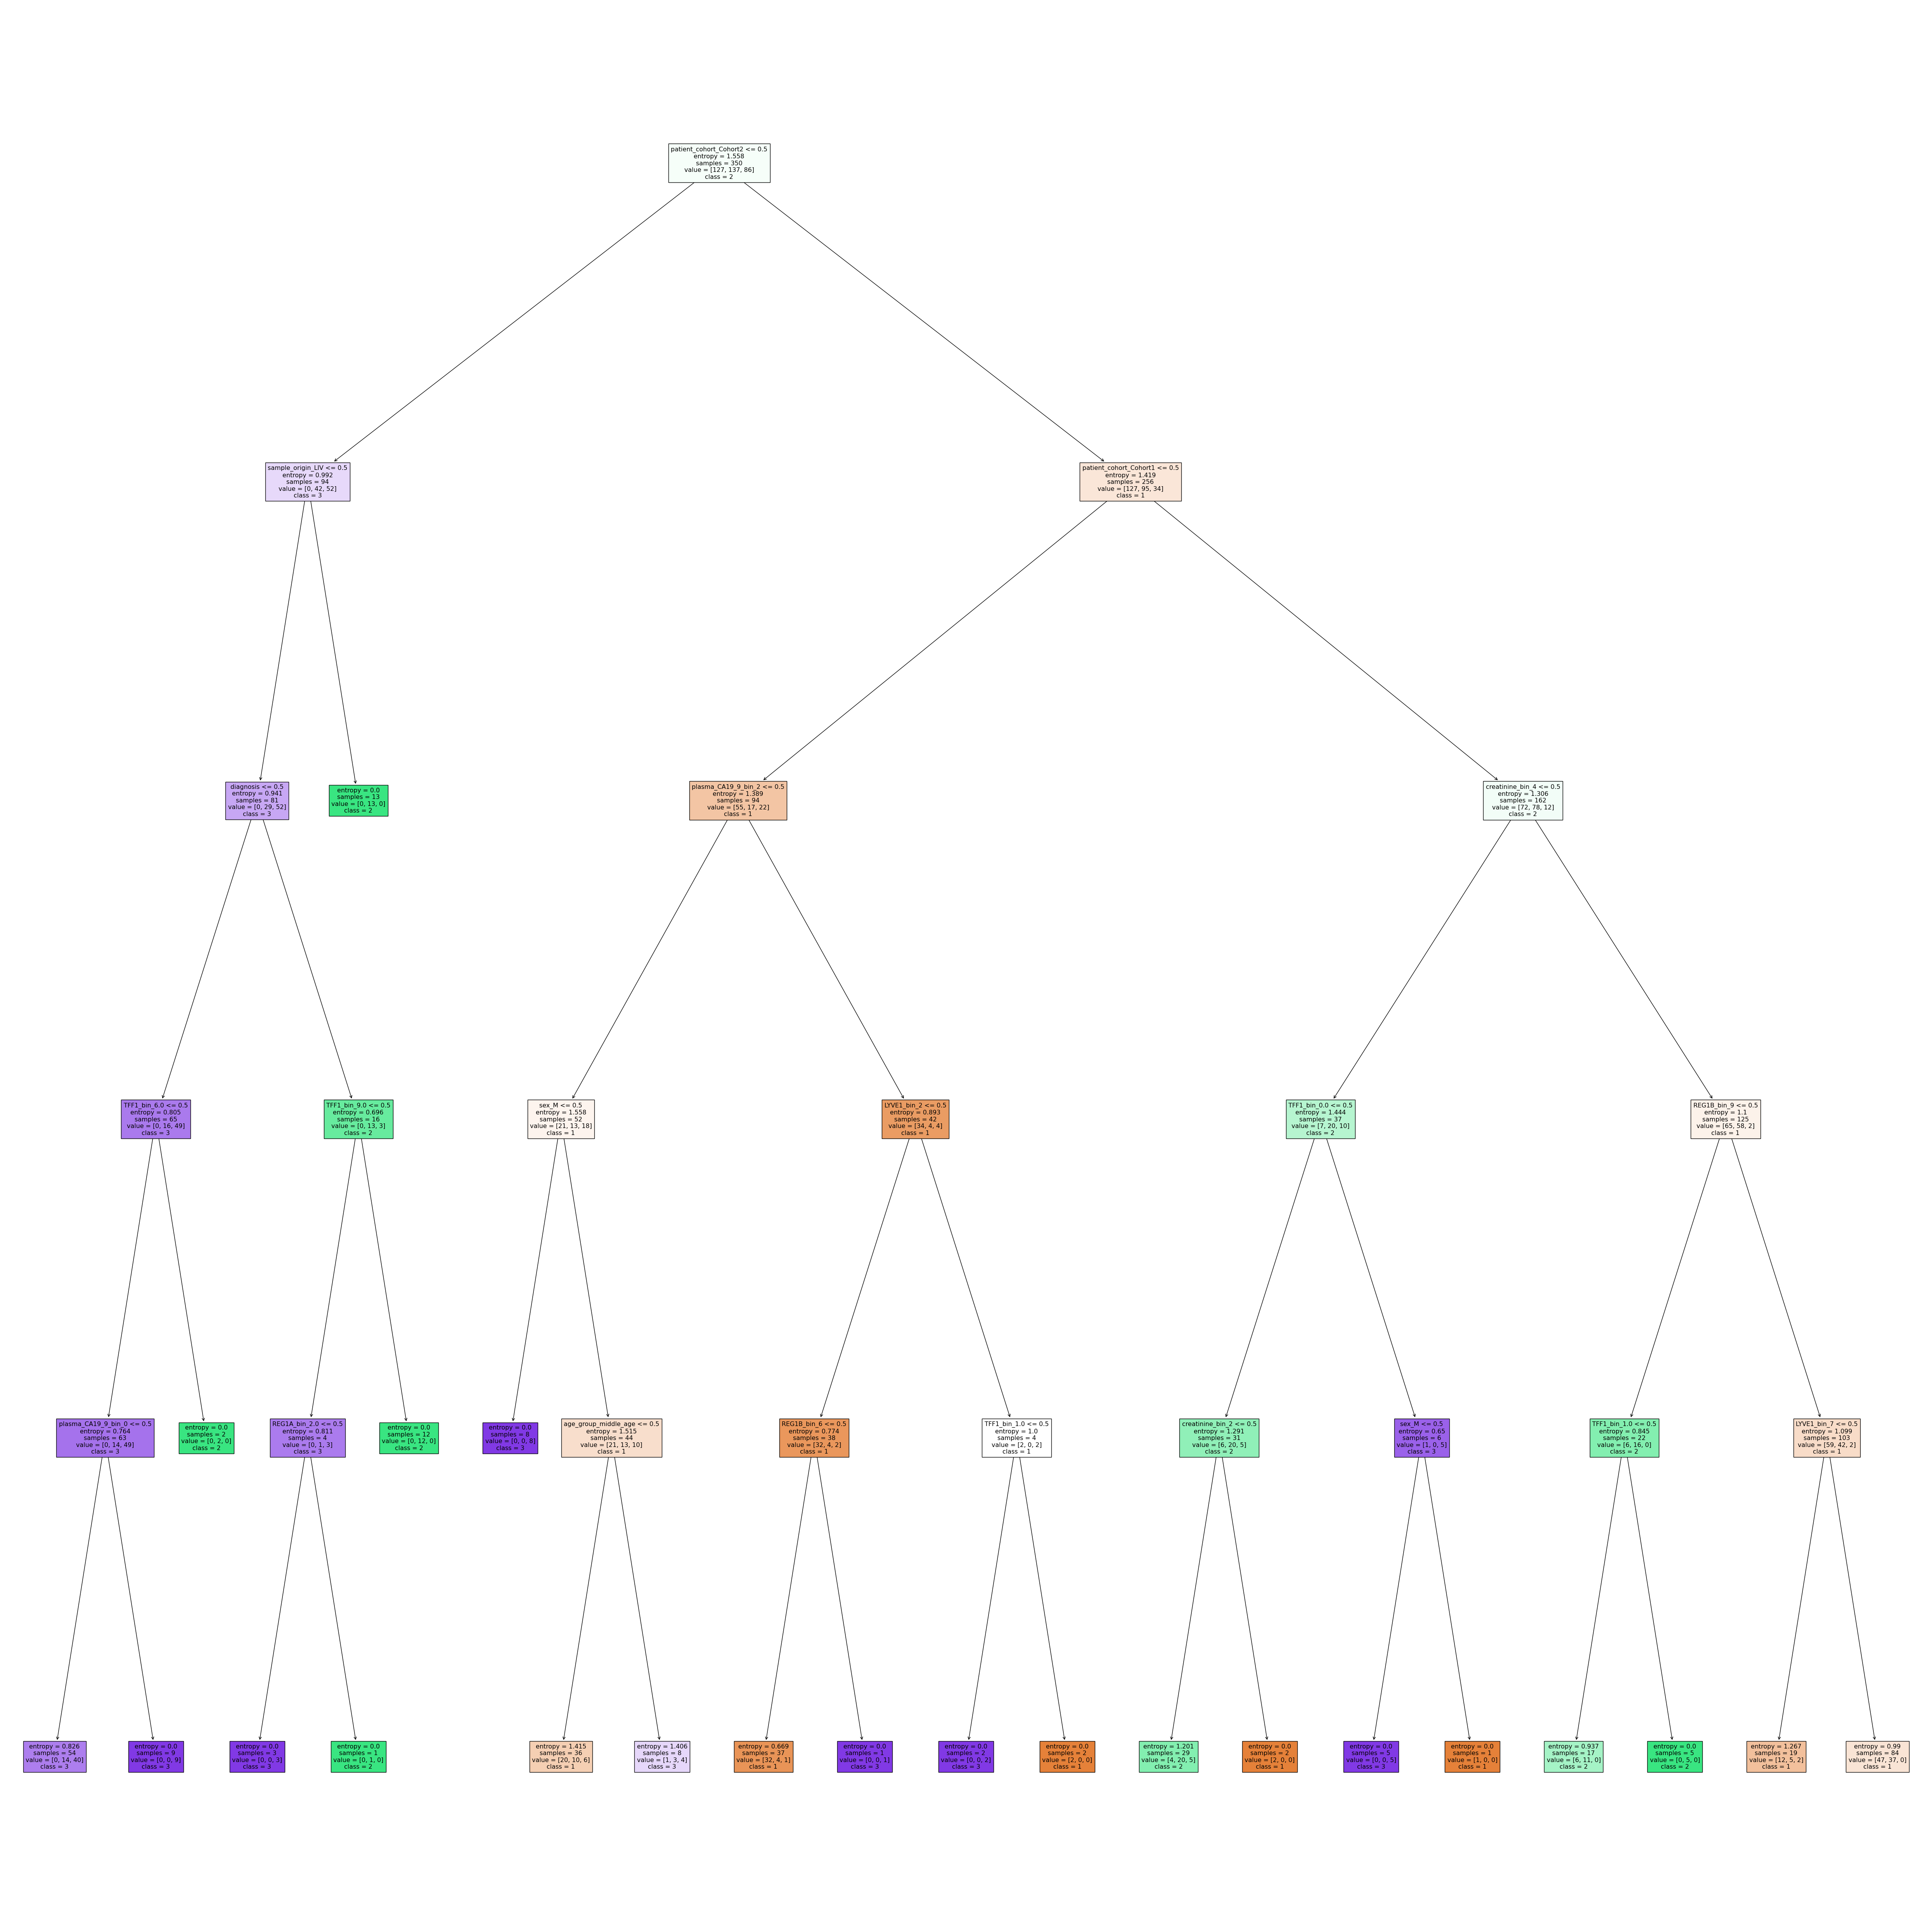

In [273]:
import matplotlib.pyplot as plt
plt.figure(figsize=(64, 64))
plot_tree(myEntropyTree, feature_names=df.columns[:-1], class_names=df['diagnosis'].astype(str).unique(), filled=True)
plt.show()

In [274]:
#Decision Tree Classification using gini as the criterion
myGiniTree = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
myGiniTree = myGiniTree.fit(x_train, y_train)
predictions = myEntropyTree.predict(x_test)
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, predictions)))
# Calculate ROC-AUC score for the Gini Tree
y_prob_gini_tree = myGiniTree.predict_proba(x_test)
roc_auc_gini_tree = roc_auc_score(y_test, y_prob_gini_tree, multi_class='ovr')
print(f"Decision Tree (Gini) ROC-AUC Score: {roc_auc_gini_tree}")

Accuracy on test data is 0.66
Decision Tree (Gini) ROC-AUC Score: 0.789895592906568


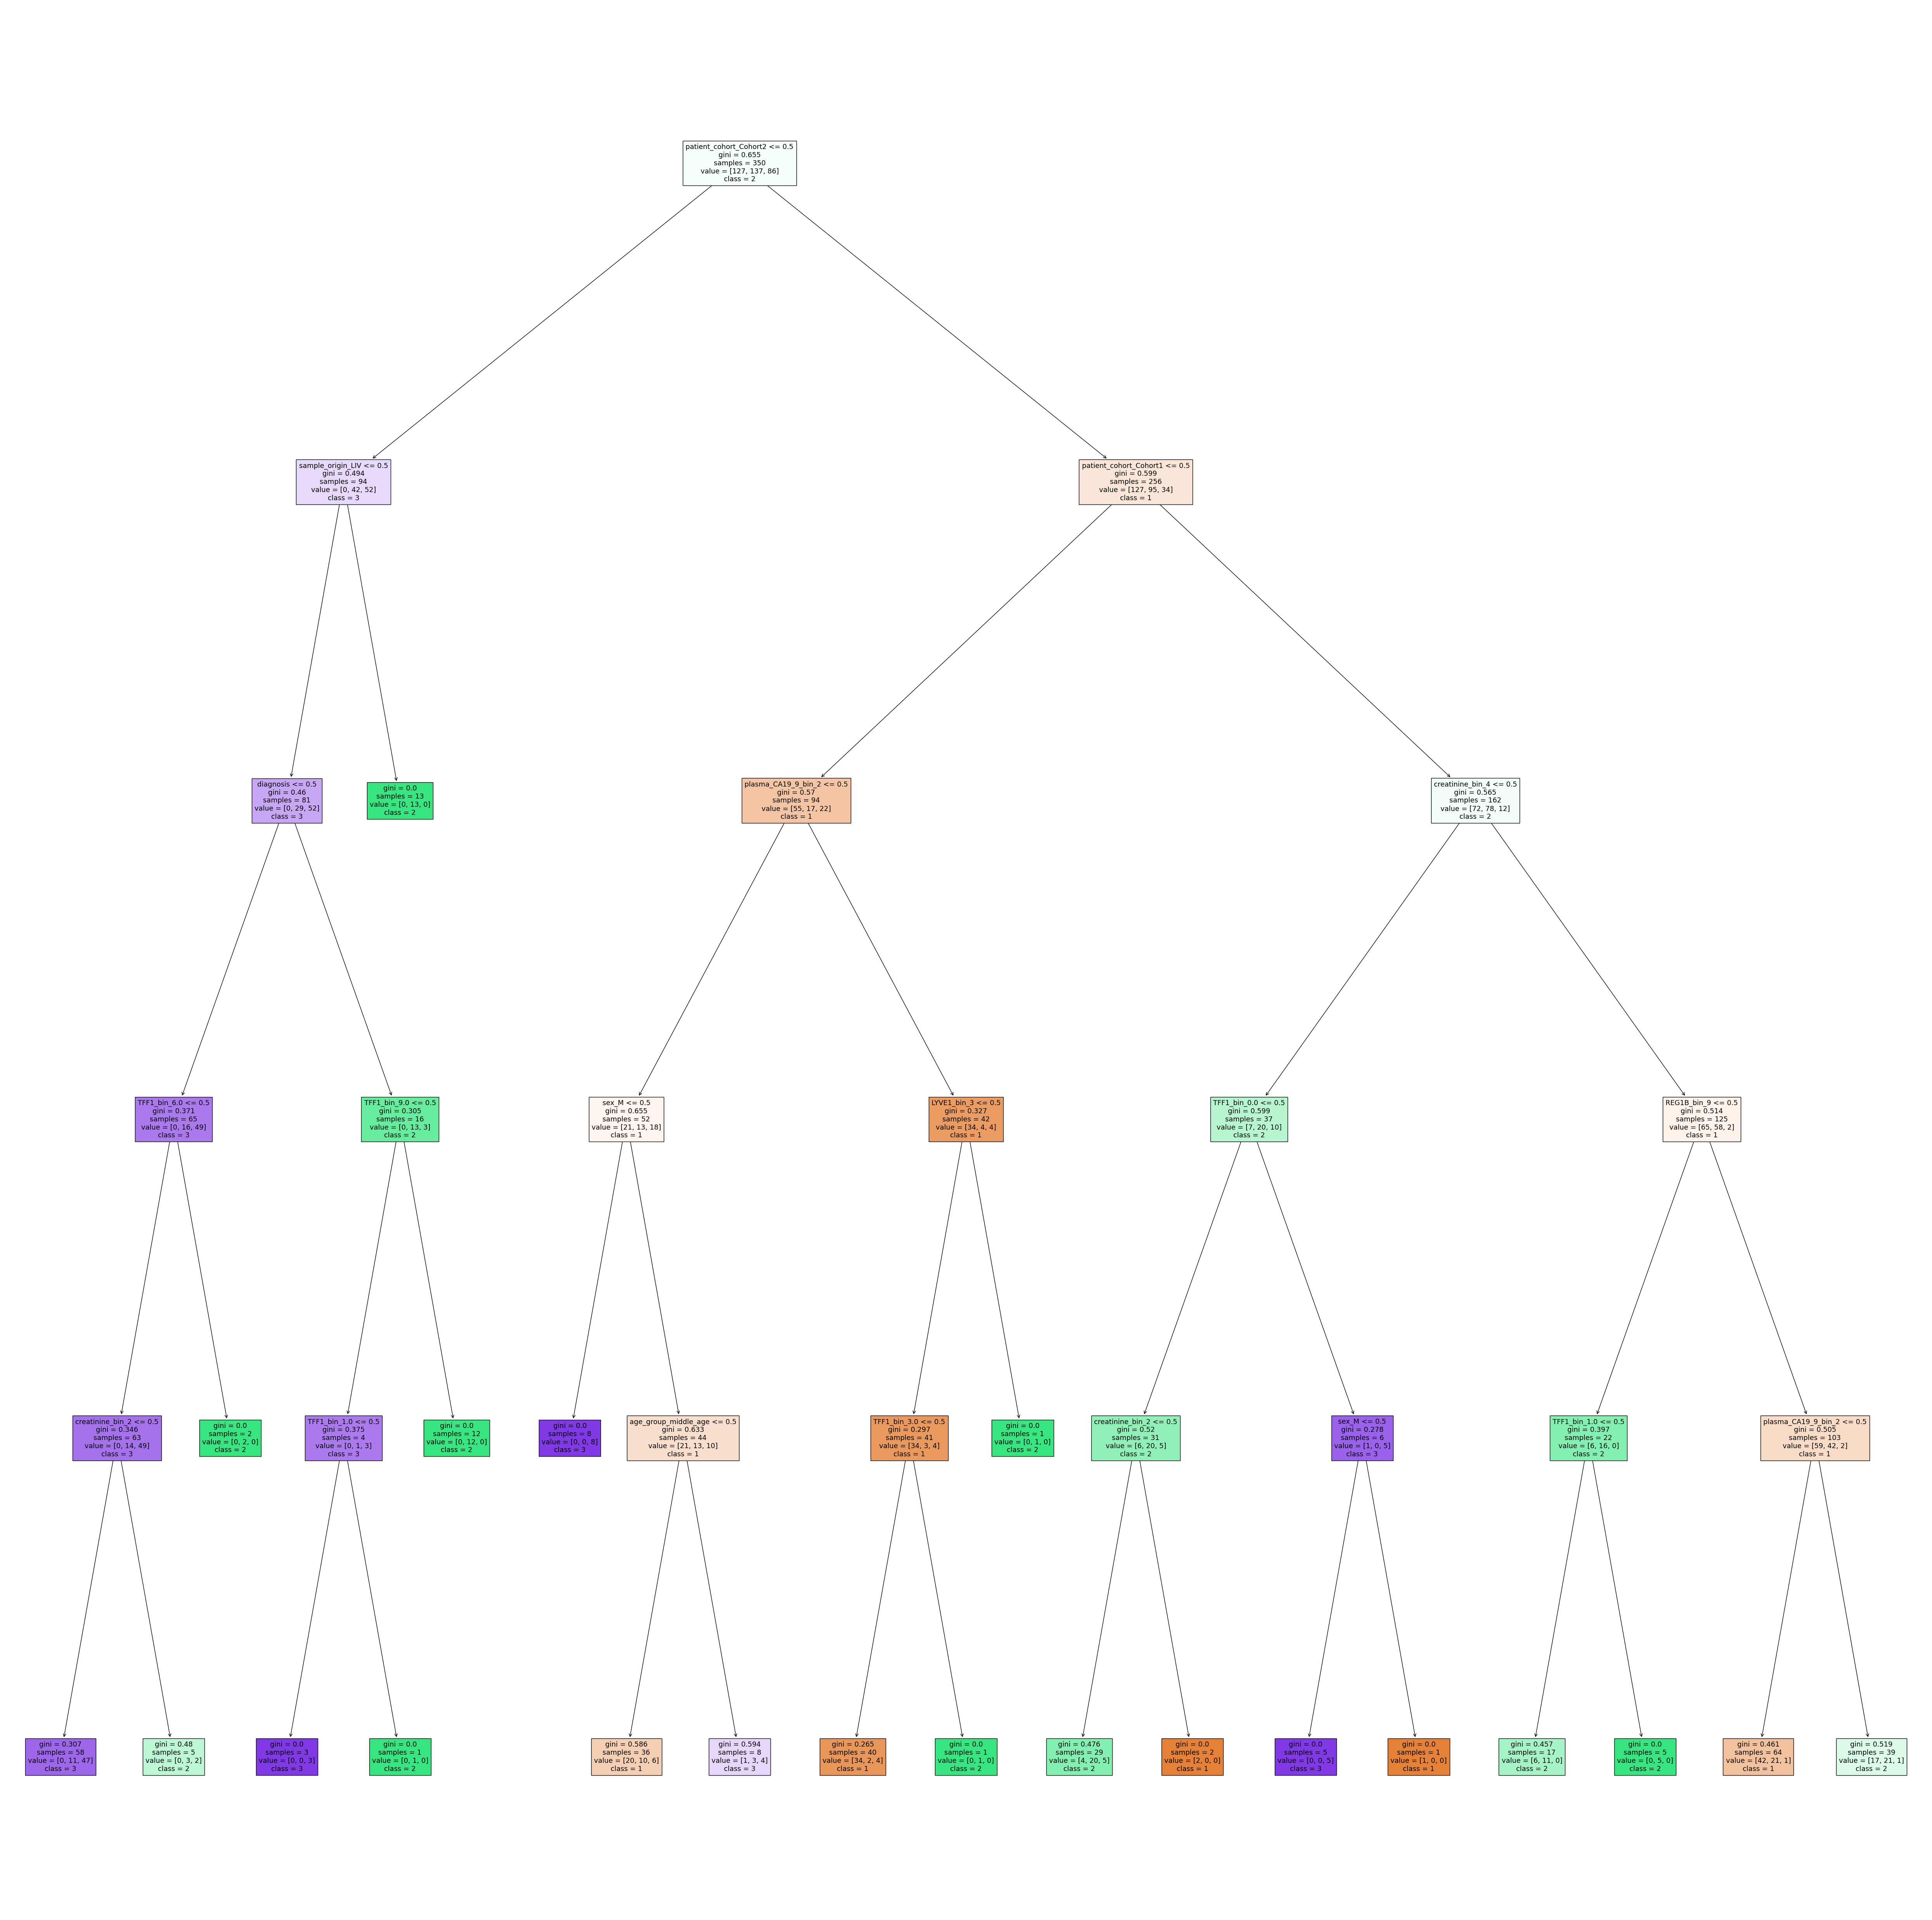

In [275]:
plt.figure(figsize=(64, 64))
plot_tree(myGiniTree, feature_names=df.columns[:-1], class_names=df['diagnosis'].astype(str).unique(), filled=True)
plt.show()

In [276]:
#Here we will perform a RandomForest Classification Algorithm
# Initialize the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=55, random_state=100)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Get predicted probabilities for positive class
y_prob_rf = rf_model.predict_proba(x_test)

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')

print(f"Random Forest ROC-AUC Score: {roc_auc_rf}")

Random Forest Classifier Results:
Accuracy: 0.7218543046357616

Confusion Matrix:
 [[43 10  0]
 [15 35  7]
 [ 2  8 31]]

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.81      0.76        53
           2       0.66      0.61      0.64        57
           3       0.82      0.76      0.78        41

    accuracy                           0.72       151
   macro avg       0.73      0.73      0.73       151
weighted avg       0.72      0.72      0.72       151

Random Forest ROC-AUC Score: 0.8595537970930978


Text(0, 0.5, 'accuracy')

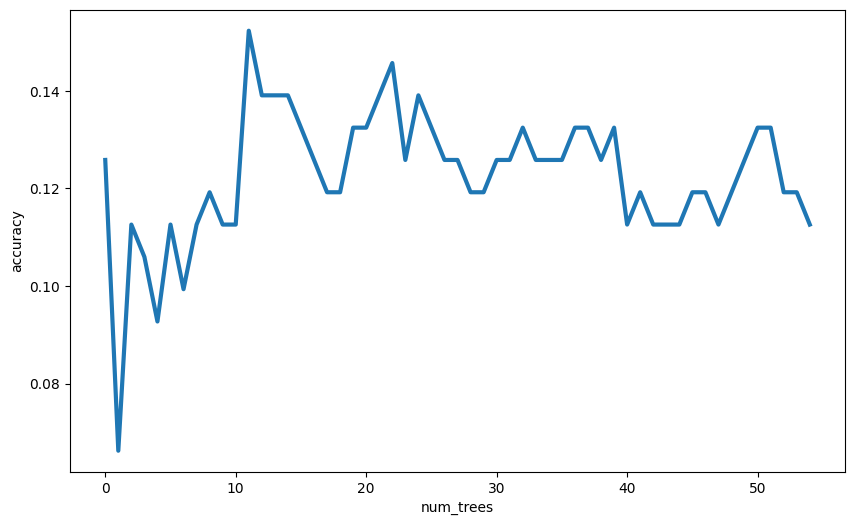

In [277]:
#https://www.kaggle.com/code/ahmedabdulhamid/best-n-estimators-for-randomforest
#Code to determine the best number of n-estimators for a randomforest
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X has feature names, but DecisionTreeClassifier was fitted without feature names")
predictions = []
for tree in rf_model.estimators_:
    predictions.append(tree.predict_proba(x_test)[None, :])
predictions = np.vstack(predictions)
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')

We can see that the accuracy remains stable any where over roughly 35

In [278]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize the sorted feature importance
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")



Feature Importance:
patient_cohort_Cohort2: 0.0736226543693972
creatinine_bin_4: 0.04864392092025004
sample_origin_ESP: 0.04843516015589129
plasma_CA19_9_bin_2: 0.04690041900355344
diagnosis: 0.04368211809899376
plasma_CA19_9_bin_9: 0.040661058181695485
sex_M: 0.03858438796227508
REG1B_bin_9: 0.032502903265900454
age_group_middle_age: 0.03176642996266352
age_group_adult: 0.029622144565342144
creatinine_bin_0: 0.029166026812145973
LYVE1_bin_7: 0.02871779908761989
sample_origin_UCL: 0.026997021458985845
age_group_senior: 0.02680806164043426
creatinine_bin_1: 0.024645717764725163
TFF1_bin_0.0: 0.023726462117882218
TFF1_bin_9.0: 0.022520904972546447
sex_F: 0.02218203890885855
REG1B_bin_0: 0.021912430117740925
REG1A_bin_2.0: 0.021815058332552317
sample_origin_LIV: 0.021000697588431958
patient_cohort_Cohort1: 0.0208689273838194
TFF1_bin_2.0: 0.019189074838497928
LYVE1_bin_0: 0.018773620008268654
TFF1_bin_1.0: 0.01861447520440139
REG1B_bin_1: 0.018092675977722295
LYVE1_bin_1: 0.01783842722007

In [279]:
#We will now use naives bayes to classify the data
from sklearn.naive_bayes import MultinomialNB
# Create a Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Get predicted probabilities for the positive class
y_prob = nb_model.predict_proba(x_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.6026490066225165
Confusion Matrix:
[[46  3  4]
 [27 18 12]
 [ 3 11 27]]
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.87      0.71        53
           2       0.56      0.32      0.40        57
           3       0.63      0.66      0.64        41

    accuracy                           0.60       151
   macro avg       0.60      0.61      0.59       151
weighted avg       0.60      0.60      0.58       151

ROC-AUC Score: 0.8126750885594957


In [280]:
#Now lets implement Apriori
#First we'll further clean the data, and create some general rules, as well as diagnosis specific rules

#We may also need to convert the diagnosis codes to binary values for the case of the apriori analysis
df = pd.get_dummies(df, columns=['diagnosis'])
column_names = df.columns
print(column_names)
df.head()

Index(['age_group_adult', 'age_group_middle_age', 'age_group_senior',
       'patient_cohort_Cohort1', 'patient_cohort_Cohort2',
       'sample_origin_BPTB', 'sample_origin_ESP', 'sample_origin_LIV',
       'sample_origin_UCL', 'sex_F', 'sex_M', 'plasma_CA19_9_bin_0',
       'plasma_CA19_9_bin_1', 'plasma_CA19_9_bin_2', 'plasma_CA19_9_bin_3',
       'plasma_CA19_9_bin_4', 'plasma_CA19_9_bin_5', 'plasma_CA19_9_bin_6',
       'plasma_CA19_9_bin_7', 'plasma_CA19_9_bin_8', 'plasma_CA19_9_bin_9',
       'creatinine_bin_0', 'creatinine_bin_1', 'creatinine_bin_2',
       'creatinine_bin_3', 'creatinine_bin_4', 'LYVE1_bin_0', 'LYVE1_bin_1',
       'LYVE1_bin_2', 'LYVE1_bin_3', 'LYVE1_bin_4', 'LYVE1_bin_5',
       'LYVE1_bin_6', 'LYVE1_bin_7', 'REG1B_bin_0', 'REG1B_bin_1',
       'REG1B_bin_2', 'REG1B_bin_3', 'REG1B_bin_4', 'REG1B_bin_5',
       'REG1B_bin_6', 'REG1B_bin_7', 'REG1B_bin_9', 'TFF1_bin_0.0',
       'TFF1_bin_1.0', 'TFF1_bin_2.0', 'TFF1_bin_3.0', 'TFF1_bin_4.0',
       'TFF1_bin_5.

,age_group_adult,age_group_middle_age,age_group_senior,patient_cohort_Cohort1,patient_cohort_Cohort2,sample_origin_BPTB,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_F,...,REG1A_bin_3.0,REG1A_bin_4.0,REG1A_bin_5.0,REG1A_bin_6.0,REG1A_bin_7.0,REG1A_bin_8.0,REG1A_bin_9.0,diagnosis_1,diagnosis_2,diagnosis_3
0,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [281]:
#General association rule mining on the data set pre-classification, using support as our metric
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
pd.set_option('display.max_colwidth', None)



In [282]:
#Now lets look at association rules where the consequent is a diagnosis, 
#to see what factors contribute most significantly to no diagnosis (Code: 1(No diagnosis))
#We will be using 6 item-sets, with a minimum threshold of 10%
diagnoses = ['diagnosis_1']
frequent_items = apriori(df, min_support=0.10, use_colnames=True)
diagnosis_rules = association_rules(frequent_items, metric='confidence', min_threshold=0.10)
diagnosis_rules = diagnosis_rules[
    (diagnosis_rules['antecedents'].apply(lambda x: len(x) == 6)) &  # Filter for 6-itemset antecedents (Seems to be the best approximation we can make for a few rules)
    (diagnosis_rules['consequents'].apply(lambda x: any(diagnosis in str(x) for diagnosis in diagnoses)))
]
sorted_diagnosis_rules = diagnosis_rules.sort_values(by='confidence', ascending=False).head(10)
sortedByLift = diagnosis_rules.sort_values(by='lift', ascending=False).head(10)
sortedBySupport = diagnosis_rules.sort_values(by='support', ascending=False).head(10)

print("Association Rules for Diagnoses Sorted By Confidence:")
print(sorted_diagnosis_rules)
print()

print("Association Rules for Diagnosis Sorted By Lift")
print(sortedByLift)
print()

print("Association Rules for Diagnoses Sorted by Support")
print(sortedBySupport)
print()

Association Rules for Diagnoses Sorted By Confidence:
                                                                                                       antecedents  \
24886  (plasma_CA19_9_bin_0, patient_cohort_Cohort2, sample_origin_BPTB, REG1A_bin_3.0, LYVE1_bin_0, TFF1_bin_0.0)   
24256                (sex_F, patient_cohort_Cohort2, sample_origin_BPTB, REG1A_bin_3.0, LYVE1_bin_0, TFF1_bin_0.0)   
26146                           (TFF1_bin_0.0, sex_F, sample_origin_BPTB, REG1A_bin_3.0, LYVE1_bin_0, REG1B_bin_0)   
24004                  (TFF1_bin_0.0, sex_F, patient_cohort_Cohort2, sample_origin_BPTB, LYVE1_bin_0, REG1B_bin_0)   
26931                  (TFF1_bin_0.0, sex_F, patient_cohort_Cohort2, sample_origin_BPTB, LYVE1_bin_0, REG1B_bin_0)   
25768                       (TFF1_bin_0.0, sex_F, patient_cohort_Cohort2, REG1A_bin_3.0, LYVE1_bin_0, REG1B_bin_0)   
26932                       (TFF1_bin_0.0, sex_F, patient_cohort_Cohort2, REG1A_bin_3.0, LYVE1_bin_0, REG1B_bin_0)   
26

/Users/ryanhandley/.pyenv/versions/3.8.10/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [283]:
#Now lets look at association rules where the consequent is a diagnosis, 
#to see what factors contribute most significantly to some sort of non-cancerous diagnosis (Code: 2(Benign))
#We will be using 5 item-sets, with a minimum confidence threshold and support of 10%
diagnoses = ['diagnosis_2']
frequent_items = apriori(df, min_support=0.10, use_colnames=True)
diagnosis_rules = association_rules(frequent_items, metric='confidence', min_threshold=0.10)
diagnosis_rules = diagnosis_rules[
    (diagnosis_rules['antecedents'].apply(lambda x: len(x) == 5)) &  # Filter for 5-itemset antecedents
    (diagnosis_rules['consequents'].apply(lambda x: any(diagnosis in str(x) for diagnosis in diagnoses)))
]
sorted_diagnosis_rules = diagnosis_rules.sort_values(by='confidence', ascending=False).head(10)
sortedByLift = diagnosis_rules.sort_values(by='lift', ascending=False).head(10)
sortedBySupport = diagnosis_rules.sort_values(by='support', ascending=False).head(10)

print("Association Rules for Diagnoses Sorted By Confidence:")
print(sorted_diagnosis_rules)
print()

print("Association Rules for Diagnosis Sorted By Lift")
print(sortedByLift)
print()

print("Association Rules for Diagnoses Sorted by Support")
print(sortedBySupport)
print()


/Users/ryanhandley/.pyenv/versions/3.8.10/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules for Diagnoses Sorted By Confidence:
                                                                                  antecedents  \
19395  (REG1B_bin_0, patient_cohort_Cohort2, sample_origin_BPTB, REG1A_bin_3.0, TFF1_bin_0.0)   
19147   (patient_cohort_Cohort2, sample_origin_BPTB, REG1A_bin_3.0, LYVE1_bin_0, REG1B_bin_0)   
17535         (sex_F, patient_cohort_Cohort2, sample_origin_BPTB, REG1A_bin_3.0, REG1B_bin_0)   
19023    (REG1B_bin_0, patient_cohort_Cohort2, sample_origin_BPTB, LYVE1_bin_0, TFF1_bin_0.0)   
25408    (REG1B_bin_0, patient_cohort_Cohort2, sample_origin_BPTB, LYVE1_bin_0, TFF1_bin_0.0)   
22433             (REG1B_bin_0, sample_origin_BPTB, REG1A_bin_3.0, LYVE1_bin_0, TFF1_bin_0.0)   
20697         (REG1B_bin_0, patient_cohort_Cohort2, REG1A_bin_3.0, LYVE1_bin_0, TFF1_bin_0.0)   
25409         (REG1B_bin_0, patient_cohort_Cohort2, REG1A_bin_3.0, LYVE1_bin_0, TFF1_bin_0.0)   
17287         (sex_F, patient_cohort_Cohort2, sample_origin_BPTB, REG1A_b

In [284]:
#Now lets look at association rules where the consequent is a diagnosis, 
#to see what factors contribute most significantly to some sort of cancer diagnosis (Code: 3(Malignant))
#We will be using 3 item-sets, with a minimum confidence threshold of 50% and support of 5%
diagnoses = ['diagnosis_3']
frequent_items = apriori(df, min_support=0.05, use_colnames=True)
diagnosis_rules = association_rules(frequent_items, metric='confidence', min_threshold=0.30)
diagnosis_rules = diagnosis_rules[
    (diagnosis_rules['antecedents'].apply(lambda x: len(x) == 3)) &  # Filter for 3-itemset antecedents (Maximum attainable)
    (diagnosis_rules['consequents'].apply(lambda x: any(diagnosis in str(x) for diagnosis in diagnoses)))
]
sorted_diagnosis_rules = diagnosis_rules.sort_values(by='confidence', ascending=False).head(10)
sortedByLift = diagnosis_rules.sort_values(by='lift', ascending=False).head(10)
sortedBySupport = diagnosis_rules.sort_values(by='support', ascending=False).head(10)

print("Association Rules for Diagnoses Sorted By Confidence:")
print(sorted_diagnosis_rules)
print()

print("Association Rules for Diagnosis Sorted By Lift")
print(sortedByLift)
print()

print("Association Rules for Diagnoses Sorted by Support")
print(sortedBySupport)
print()


/Users/ryanhandley/.pyenv/versions/3.8.10/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules for Diagnoses Sorted By Confidence:
                                                        antecedents  \
5931  (age_group_senior, patient_cohort_Cohort1, sample_origin_LIV)   
6848             (patient_cohort_Cohort1, sample_origin_LIV, sex_M)   
6828             (patient_cohort_Cohort1, sample_origin_LIV, sex_F)   
5942              (age_group_senior, patient_cohort_Cohort1, sex_M)   

        consequents  antecedent support  consequent support   support  \
5931  (diagnosis_3)            0.085828            0.253493  0.067864   
6848  (diagnosis_3)            0.105788            0.253493  0.067864   
6828  (diagnosis_3)            0.087824            0.253493  0.055888   
5942  (diagnosis_3)            0.089820            0.253493  0.055888   

      confidence      lift  leverage  conviction  zhangs_metric  
5931    0.790698  3.119209  0.046107    3.566644       0.743193  
6848    0.641509  2.530679  0.041048    2.082362       0.676405  
6828    0.636364  2.510379